# Logistic Lab

In [1]:
from datascience import *
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from scipy import stats

import pandas

births = Table.read_table('baby.csv')

def my_to_binary(x):
    ### converts an array of Trues and Falses to 1's and 0's ###
    return int(x)
    
births = births.with_column("Smoker Binary", births.apply(my_to_binary, "Maternal Smoker"))
births = births.where("Smoker Binary", are.contained_in(make_array(0,1)))

import statsmodels.formula.api as sfm

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

In the cell below, we re-run a logistic regression that we ran in class.  We name the resulting model, `logistic_model`.  

In [2]:
## Prepare the data in the necessary format over the next few lines

Baby_weight = births.column("Birth Weight")
Smoker = births.column("Smoker Binary")


## On the next few lines, only edit the names of the arrays and variables
logistic_model_data = pandas.DataFrame({'Baby_Weight': Baby_weight, "Smoker": Smoker})
logistic_model = sfm.logit("Smoker~Baby_Weight", data = logistic_model_data).fit()

# Print the summary
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.637774
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Smoker   No. Observations:                 1174
Model:                          Logit   Df Residuals:                     1172
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Dec 2021   Pseudo R-squ.:                 0.04693
Time:                        08:15:25   Log-Likelihood:                -748.75
converged:                       True   LL-Null:                       -785.62
                                        LLR p-value:                 8.900e-18
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.0468      0.429      7.105      0.000       2.206       3.887
Baby_Weight    -0.0294    

In the next cell, we construct the confusion matrix, and call it `confusion_matrix`.  Note that for this confusion matrix, we use a threshold, or **T**, of 0.5.  
    

In [3]:
births = births.with_column("Boolean Prediction", logistic_model.predict() >= 0.5)
births = births.with_column("Prediction", births.apply(my_to_binary, "Boolean Prediction"))
births = births.with_column("Agreement", births.column("Smoker Binary") == births.column("Prediction"))

confusion_matrix = births.select("Maternal Smoker", "Boolean Prediction").pivot("Maternal Smoker", "Boolean Prediction")

confusion_matrix

Boolean Prediction,False,True
False,635,319
True,80,140


## Problem 1 

Recall the following:

*Sensitivity* is the true positive rate.  

$$Sensitivity = \frac{True\ Positives}{All\ Real\ Positives} = \frac{True\ Positives}{True\ Positives + False\ Negatives}$$

*Specificity* is the true negative rate.  

$$Specificity = \frac{True\ Negatives}{All\ Real\ Negatives} = \frac{True\ Negatives}{True\ Negatives + False\ Positives}$$

*Positive Predictive Value* If a prediction is positive, what is the probability the observation is really positive. 

$$PPV = \frac{True\ Positives}{True\ Positives\ + \ False\ Positives}$$

*Negative Predictive Value* If a prediction is negative, what is the probability the observation is really negative.

$$NPV = \frac{True\ Negatives}{True\ Negatives\ + \ False\ Negatives}$$

### Sensitivity 

First, we compute the sensitivity from the confusion matrix using a threshold of 0.5 for the cut-off.  

In [4]:
Sensitivity = (confusion_matrix.column(2).item(1))/(confusion_matrix.column(2).item(1) + confusion_matrix.column(2).item(0))
Sensitivity

0.30501089324618735

## Problem 1.1 ##

Follow the pattern for the Sensitivity calculation above to find the Specificity for `logistic_model` with the threshold set to 0.5.  

In [5]:
Specificity = ...
Specificity

Ellipsis

## Problem 1.2 ##

Calculate the Positive Predictive Value, PPV, for `logistic_model` with the threshold set to 0.5.  

In [6]:
PPV = ...
PPV 

Ellipsis

## Problem 1.3 ##

Calculate the Negative Predictive Value, NPV, for `logistic_model` with the threshold set to 0.5.  

In [7]:
NPV = ...
NPV

Ellipsis

## Problem 2

In this problem, we're going to experiment with changing the threshold for classifying a prediction as a 1.  

In the cell below, we write a function called `sensitivity`.  We then also apply that function to a column called **T**, and we graph the Sensitivity vs P.  

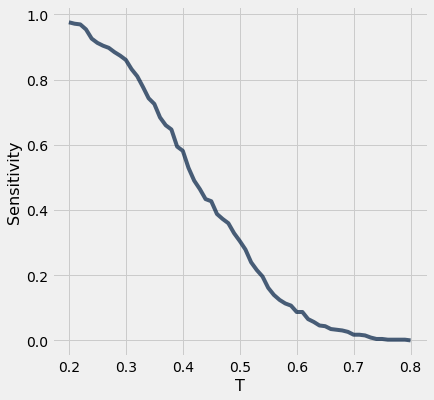

In [8]:
def sensitivity(t):
    ### Takes a threshold for p-hat, find the confusion matrix and uses it to compute sensitivity ###
    
    ## re-introducing and formatting the baby data
    births = Table.read_table('baby.csv')
    births = births.with_column("Smoker Binary", births.apply(my_to_binary, "Maternal Smoker"))
    births = births.where("Smoker Binary", are.contained_in(make_array(0,1)))
    births = births.with_column("Boolean Prediction", logistic_model.predict() >=t)
    births = births.with_column("Prediction", births.apply(my_to_binary, "Boolean Prediction"))
    births = births.with_column("Agreement", births.column("Smoker Binary") == births.column("Prediction"))
    
    ## Using pivot to make the confusion matrix
    confusion_matrix = births.select("Maternal Smoker", "Boolean Prediction").pivot("Maternal Smoker", "Boolean Prediction")
    
    ## We only need two of these four things for this function
    ## but you'll find the rest useful for other parts of this lab
    true_positives  = confusion_matrix.column(2).item(1)
    true_negatives  = confusion_matrix.column(1).item(0)
    false_positives = confusion_matrix.column(1).item(1)
    false_negatives = confusion_matrix.column(2).item(0)
    
    return (true_positives)/(true_positives + false_negatives)


model_assessment_table = Table().with_column("T", np.arange(0.2, .8, 0.01, dtype=object))
model_assessment_table = model_assessment_table.with_column("Sensitivity", model_assessment_table.apply(sensitivity, "T"))
model_assessment_table.plot("T");

## Problem 2.1 

Write your own **Specificity** function, use the **Sensitivity** function above as a model.  

In [9]:
def specificity(t):
    ### Takes a threshold for p-hat, find the confusion matrix and uses it to compute specificity ###
    return ...

## Problem 2.2

Starting with the `model_assessment_table` that we defined above, use `.apply` to add a new column for **Specificity**.

In [10]:
model_assessment_table = ...

## Problem 2.3

Plot both **Sensitivity** and **Specificity** with **P** on the x-axis.  

## Problem 2.4

Write your own PPV function.

In [11]:
def ppv(t):
    ### Takes a threshold for p-hat, find the confusion matrix and uses it to compute PPV ###
    return ...

## Problem 2.5

Using `.apply` add a column to the `model_assessment_table` for PPV.  

In [13]:
model_assessment_table = ...

## Problem 2.6

Write your own NPV function.

In [ ]:
def npv(t):
    ### Takes a threshold for p-hat, find the confusion matrix and uses it to compute NPV ###
    return ...


## Problem 2.7

Using `.apply` add a column to the `model_assessment_table` for NPV.  

In [ ]:
model_assessment_table = ...

## Problem 2.8

Plot all four model assessments with **P** on the x-axis.  

## Problem 2.9

Which value for **P** would do the most reasonable job of balancing all four of these model assessments, keeping them all close together and near the middle?

    a) 0.2 

    b) 0.4

    c) 0.6

    d) 0.8

Write your answer in the next cell.  


*Write your answer here* 